# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

print("data loaded")

data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(train['labels'])
n_validation = len(valid['labels'])

n_test = len(test['labels'])

# print(train.keys())
image_shape = train['features'][1].shape
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
from pandas.io.parsers import read_csv
from collections import Counter
import random

def display_histrogram(count, title):
    rcParams['figure.figsize'] = 40, 20
    rcParams.update({'font.size': 30})
    items = sorted(count.items())
    labels, values = zip(*items)
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.title(title)
    plt.show()

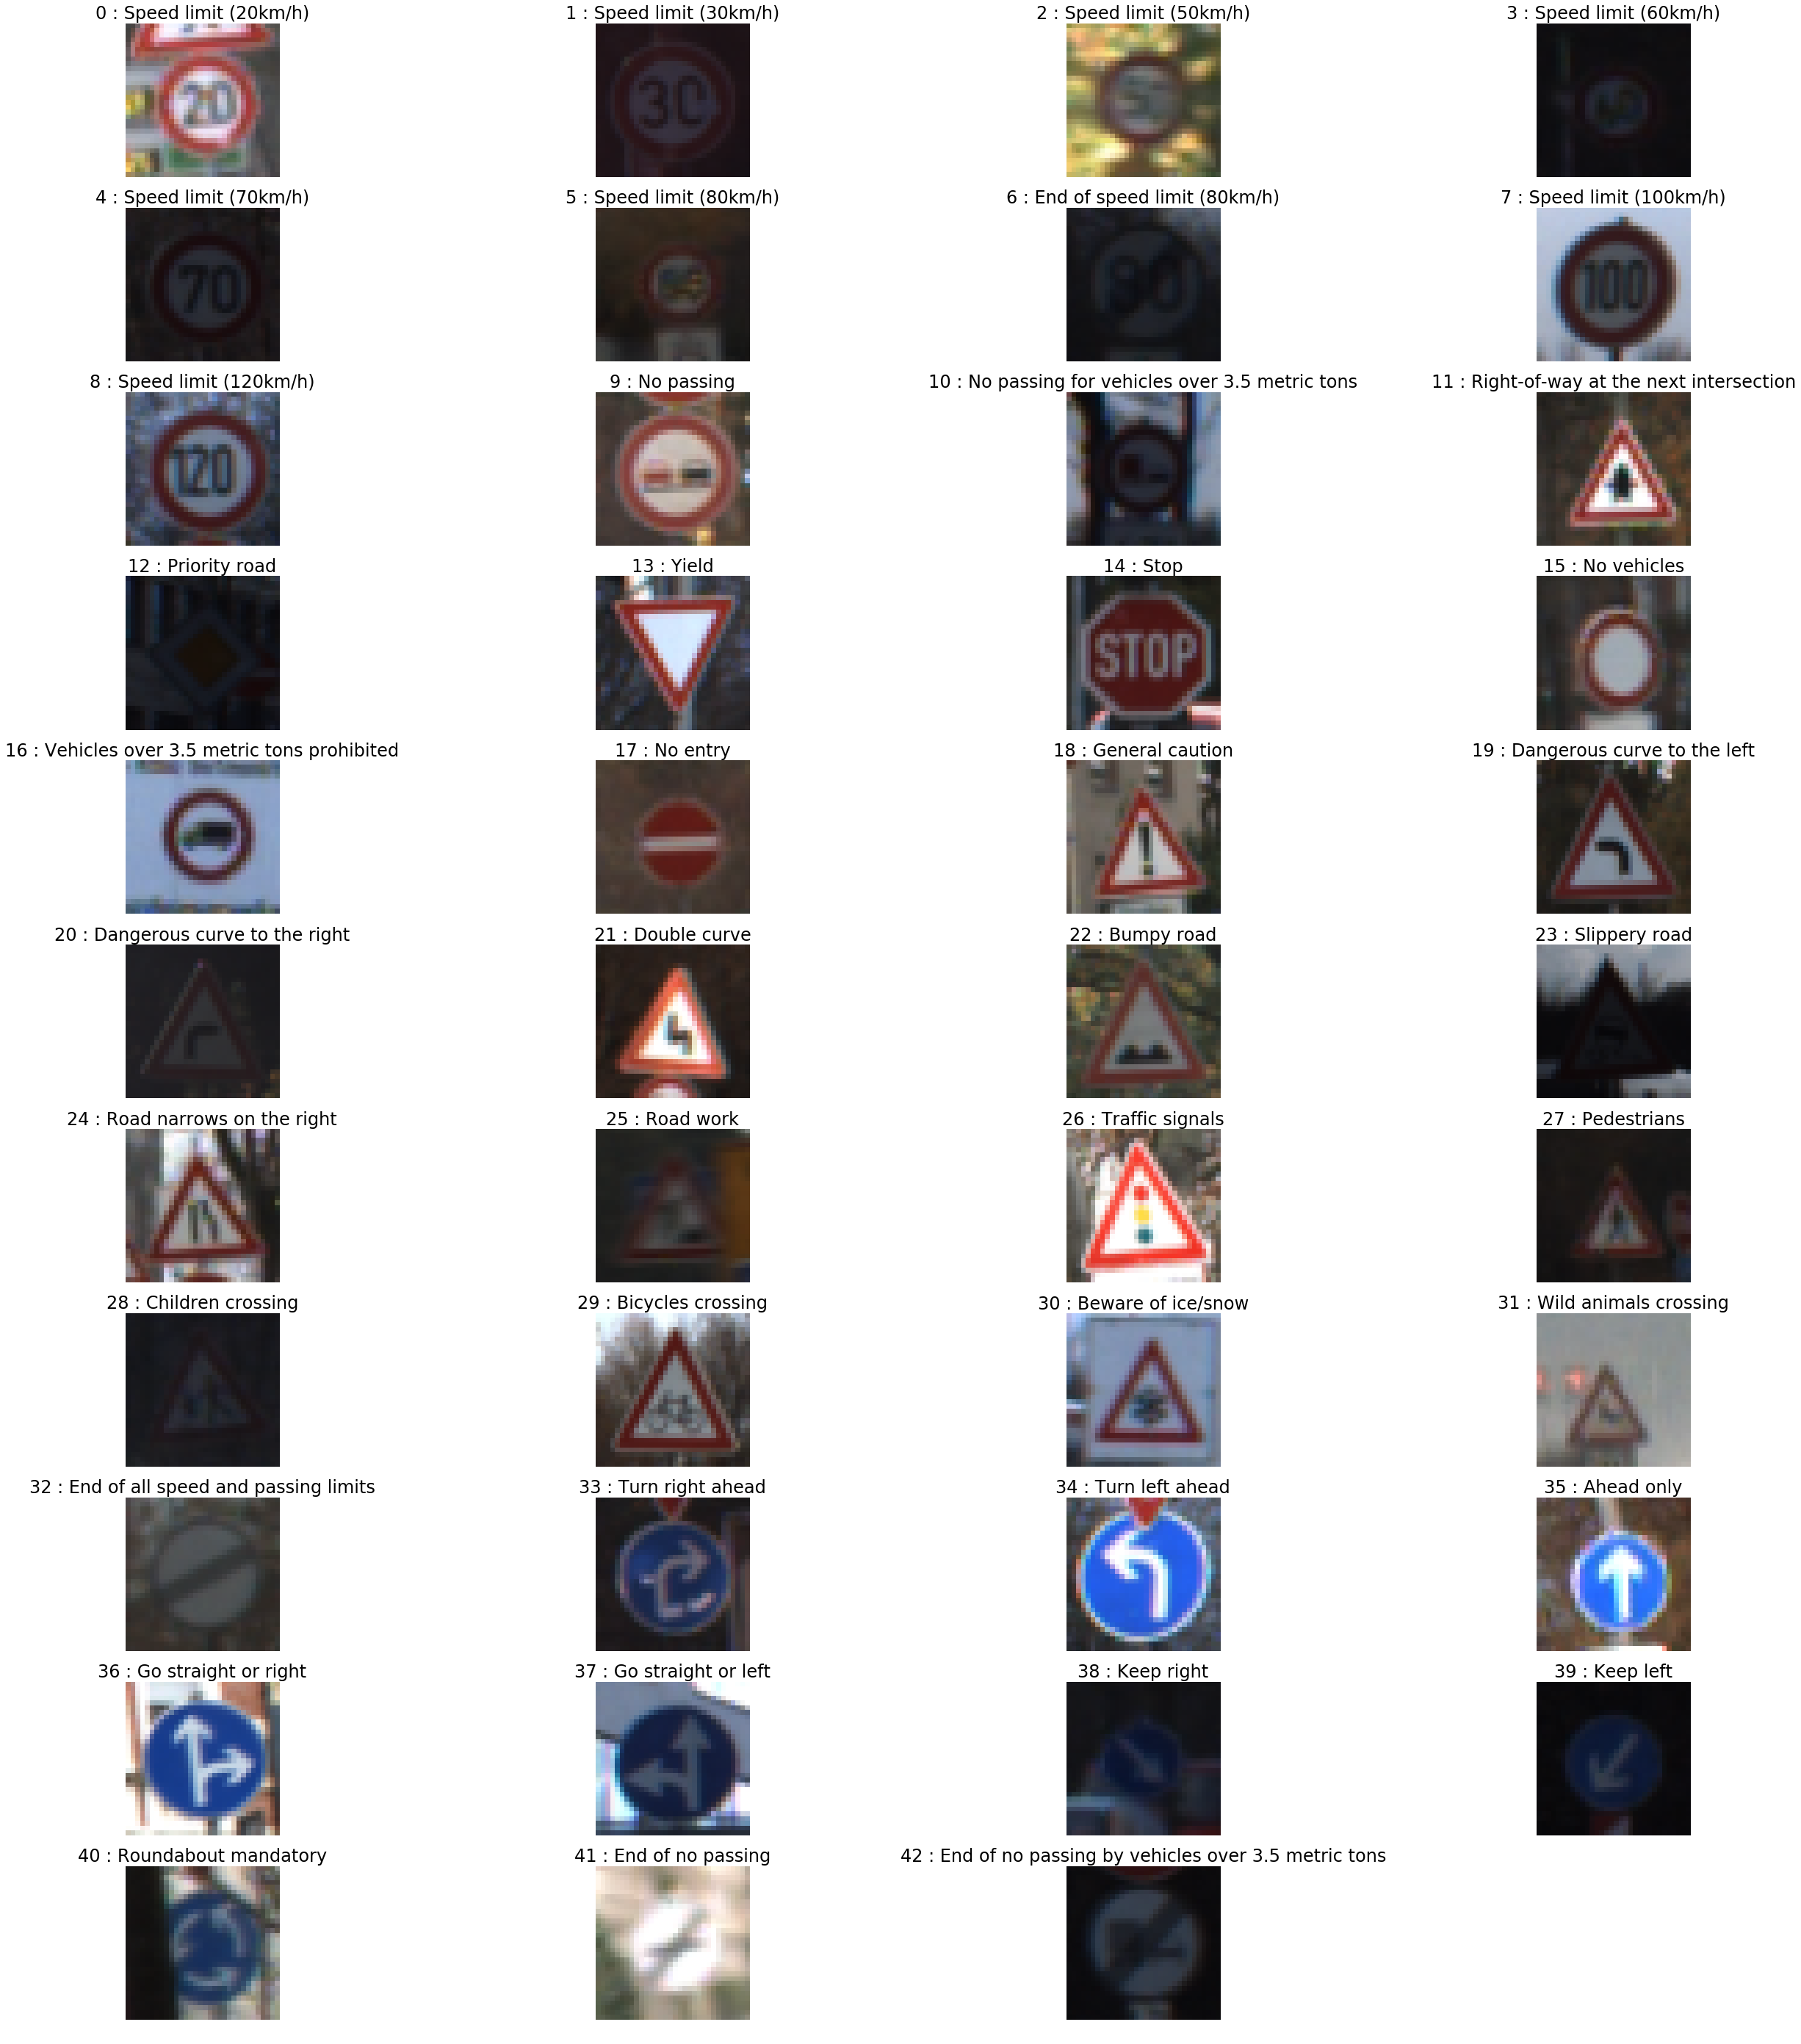

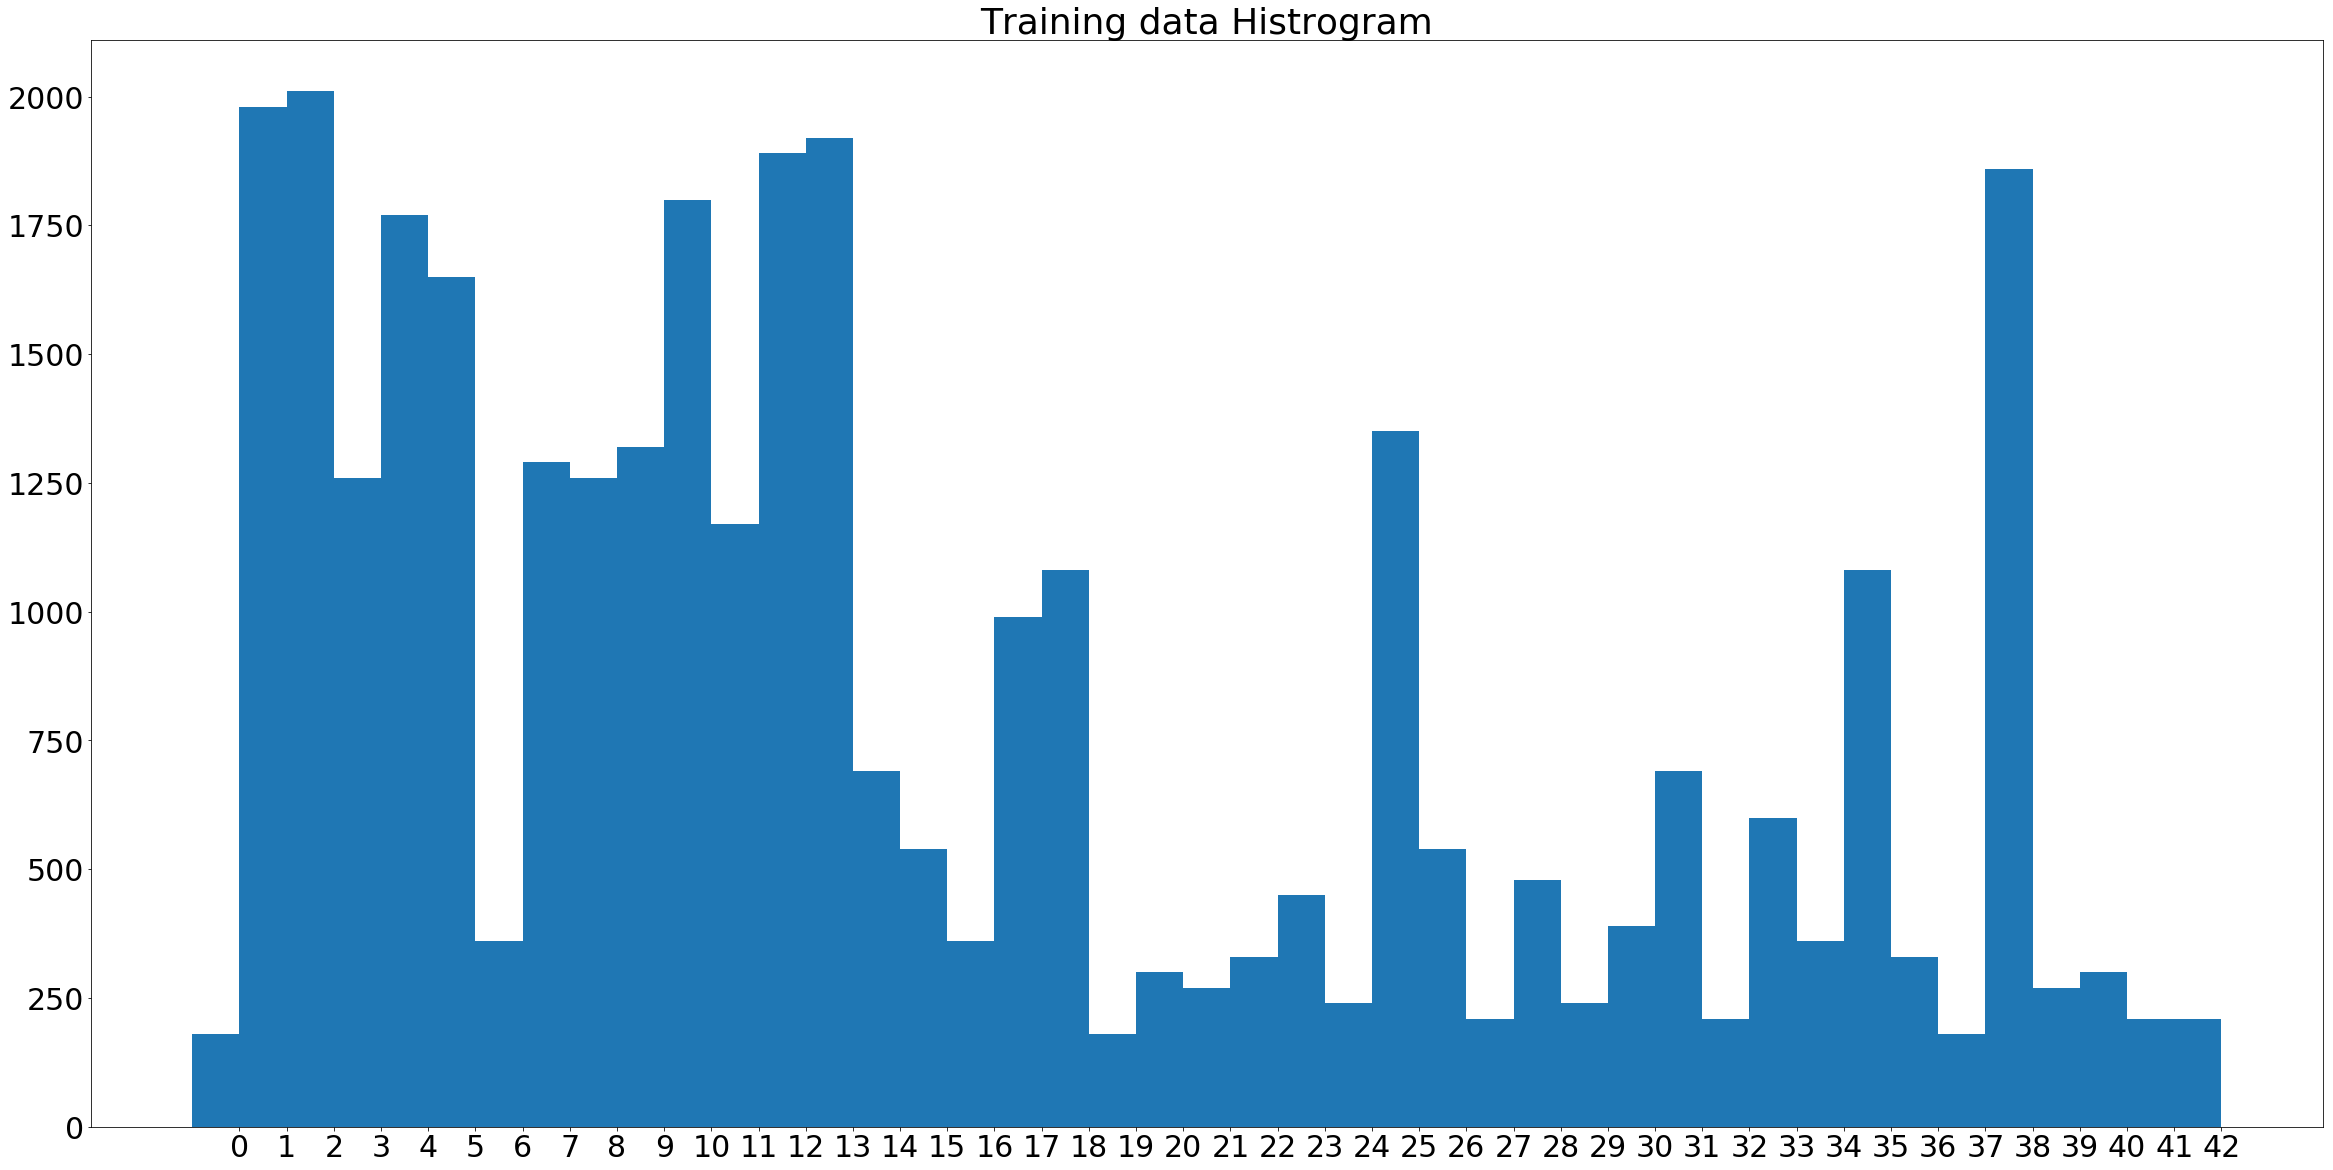

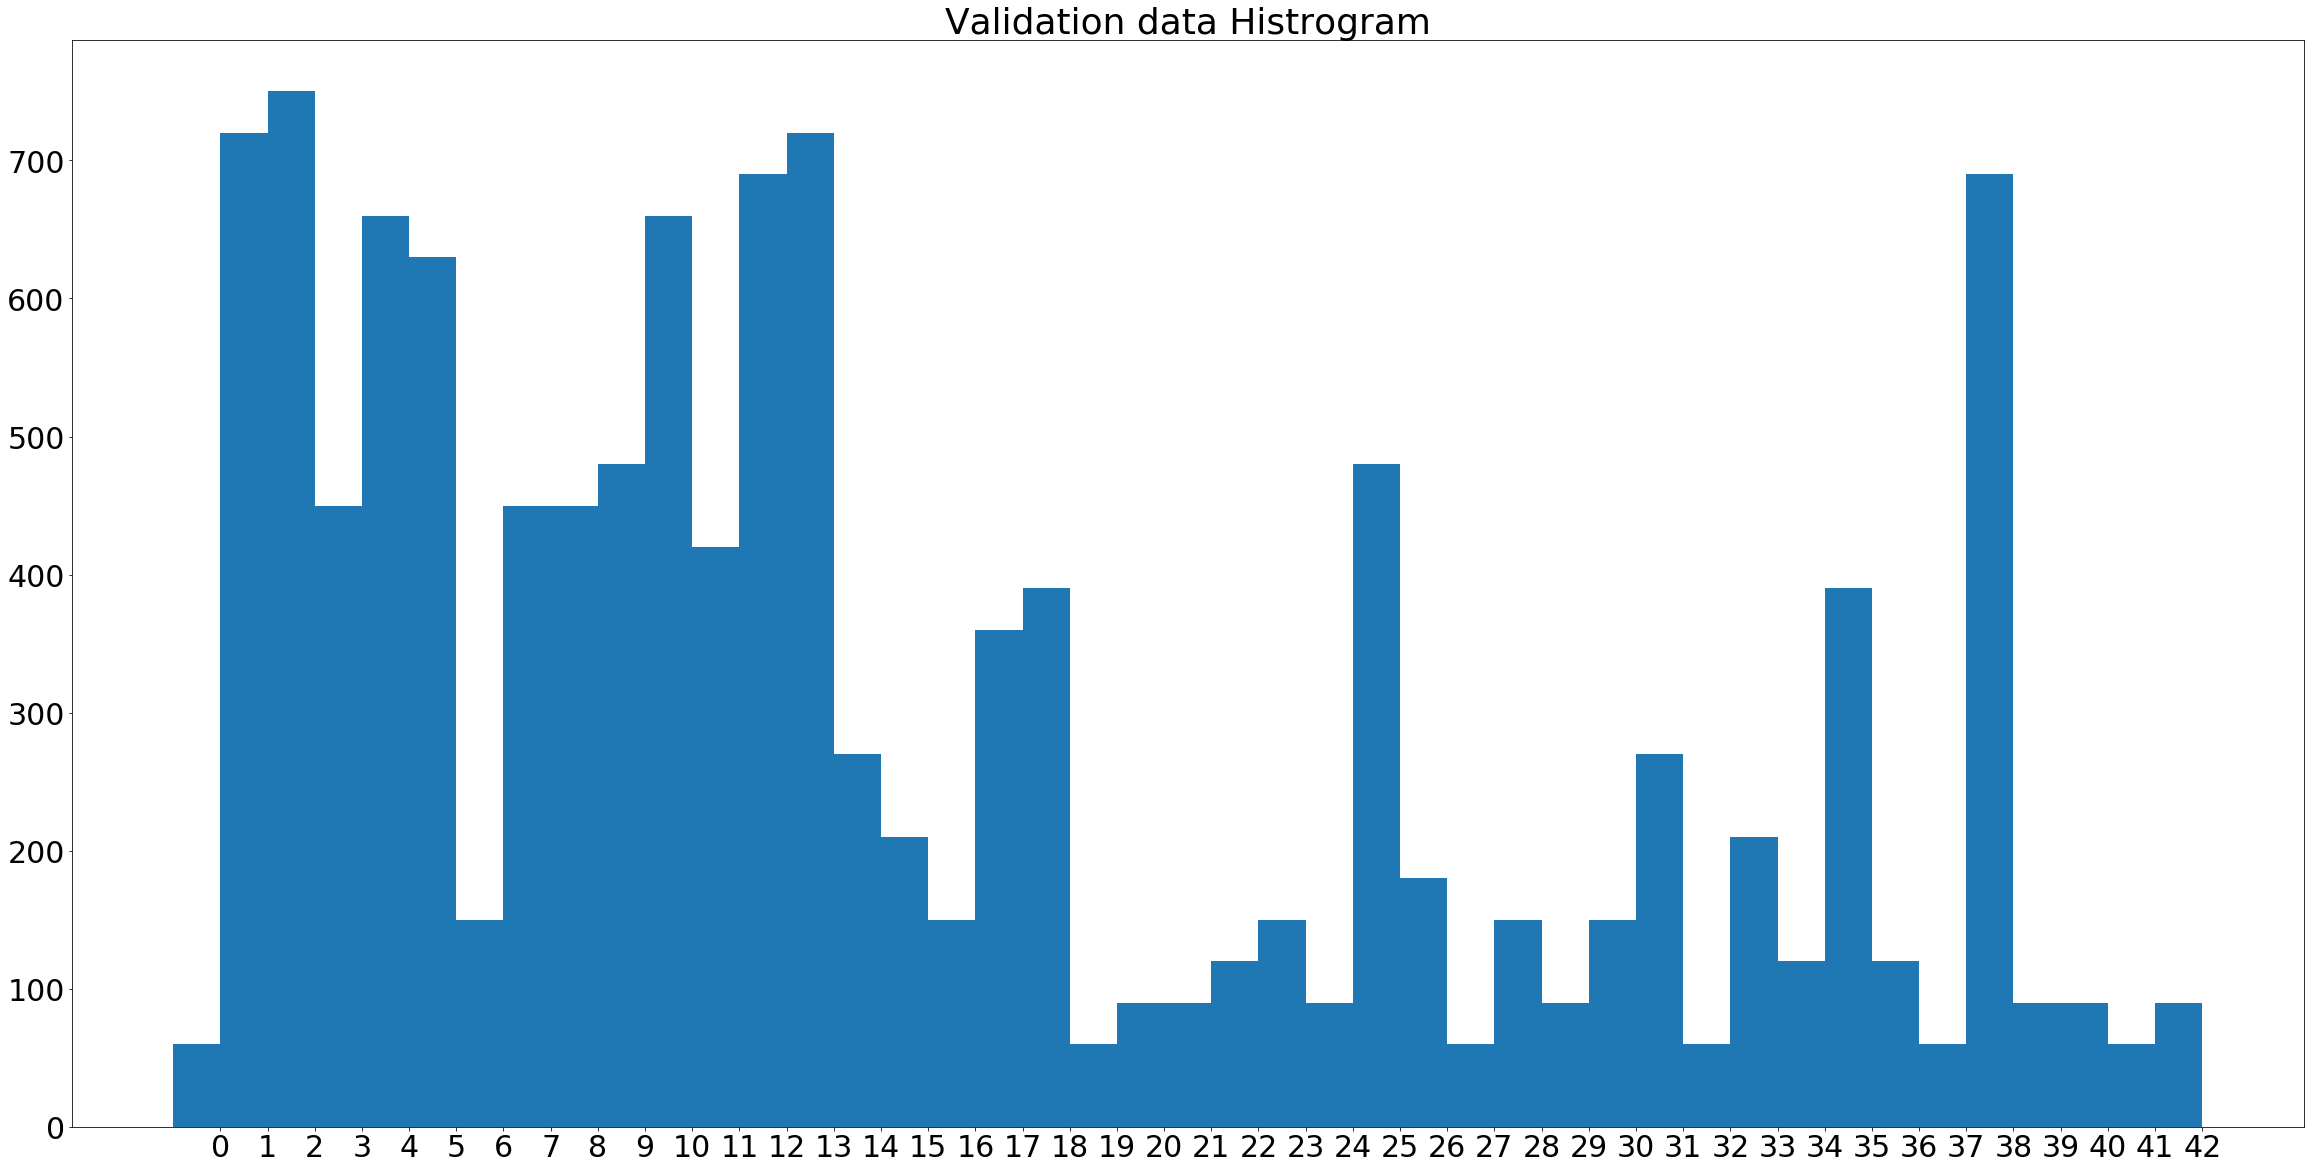

In [19]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Display sample data image
sample_to_display = 5
signnames = read_csv("signnames.csv").values[:, 1]


sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
plt.figure(figsize=[n_classes + 1, 50])

def show_img(i, index):
    rcParams.update({'font.size': 20})
    rcParams['figure.figsize'] = 40, 20
    random_indix = random.choice(range(class_indices[i], class_indices[i] + class_counts[i]))
    plt.subplot(11, 4, index)
    plt.imshow(x_train[random_indix])
    plt.axis('off')
    plt.title(str(i) + ' : '+ signnames[i])
    
for i in range(n_classes):
    show_img(i, i+1)
plt.show() 
display_histrogram(Counter(train['labels']), 'Training data Histrogram')
display_histrogram(Counter(test['labels']), 'Validation data Histrogram')



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

This pipeline covert the image to gray scale and normalize the input to the range [-0.5, 0.5]

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.utils import shuffle

def preprocess(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    normalized = (gray)/256.0 -0.5
    return np.expand_dims(normalized, axis=2)

### Balance data
The input training data is biased to certain traffic sign. Balance data step will make all class have the same number of examples by duplicating the existing example. 


In [6]:
def balance_data(x, y):
    sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
    max_count = max(class_counts)
    x_shape = x[0].shape
    print(x_shape)

    for i in range(len(sign_classes)):
        gap = max_count - class_counts[i]
#         print('class %i gap %i' %( i, gap))
        for j in range(0, gap //class_counts[i]) :
            x= np.vstack([x, x[class_indices[i]: class_indices[i] + class_counts[i]]])
            y = np.append(y, y[class_indices[i]: class_indices[i] + class_counts[i]])
        remain = gap % class_counts[i]
        x= np.vstack([x, x[class_indices[i]: class_indices[i] + remain]])
        y = np.append(y, y[class_indices[i]:class_indices[i] + remain])
    return x, y

In [7]:
print('x_train %i' % len(x_train))
print('y_train %i' % len(y_train))
x_train, y_train = balance_data(x_train, y_train)

print('x_train %i' % len(x_train))
print('y_train %i' % len(y_train))

print("balance done")
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
print(class_counts)

training_file_balance = 'data/train_balanced.p'

pickle.dump({
        "features" : x_train,
        "labels" : y_train
    }, open(training_file_balance, "wb" ) )    


x_train 34799
y_train 34799
(32, 32, 3)
x_train 86430
y_train 86430
balance done
[2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010
 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010]


### Model Architecture

I am using 5 layer Convolutional Neural network. I reused the lenet pipeline with more filter and addtional dropout pipeline 
to avoid overfitting. This pipeline also used AdamOptimizer with adaptive learning rate to with better SGD optimization

Convolutional. 
Filter layer :Input = 32x32x1. Output = 28x28x6.
Relu activation layer 
Pooling layer Input = 28x28x6. Output = 14x14x6.
Convolutional
Filter layer Input = 14x14x6. Output = 10x10x32.
Relu activation layer 
Pooling layer Input = 10x10x32. Output = 5x5x32
Fatten layer Input = 5x5x32. Output = 800.
Fully connected Input = 120. Output = 84.
Relu activation layer 
Dropout layer 0.5 keep rate 
Fully connected Input = 120. Output = 84.
Relu activation layer 
Dropout layer 0.5 keep rate
Fully connected Input = 84. Output = 10.



### approach to finding a solution
This is a common problem for image recognition, so CNN+ fully connect neural network model will work for this. 

1. Use Lenet pipeline as is to check run the pipeline. 

2. Train with more epoch to see if can improve accuracy 

3.It can not improve the accuracy with more epoch, I tried to balance the input data by duplicating the existing data since the input data is not balanced. Certain class is more frequent than the others. 

4.Convert the image to gray scale since the color does not matter too much for traffic sign and it will be affected by light

5.The training accuracy is high(0.999) and test accuracy still can not reach 0.93, we we add additional dropout layer to help overfitting issue

6.The accuracy reached 0.93, test with more filter for network and the accuracy improved slightly. 


In [9]:
EPOCHS = 60
BATCH_SIZE = 128
DROP_OUT_KEEP_PROB = 0.5
LEARNING_RATE = 0.001

In [10]:
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, DROP_OUT_KEEP_PROB)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, DROP_OUT_KEEP_PROB)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

predition_output = tf.argmax(logits, 1)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
x_train = [preprocess(x) for x in x_train]
y_train = y_train
x_validation = [preprocess(x) for x in valid['features']]
y_validation = valid['labels']

This pipeline use small 128 batch size for max 60 epoch to train the network with previous defined network. 
The learning rate is 0.001. 
This pipeline also uses early termination, if the valication acuracy can not improve 0.1 for last 5 epoch, it will stop. 

In [13]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)

    
#     x_train, y_train = x_train[:1000], y_train[:1000]

    print('x_train %i' % len(x_train))
    print('y_train %i' % len(y_train))

    validation_acuracy_list = np.array([])
    print("Training...")
    print()
    max_acuracy_index = 0
    max_acuracy = 0.0
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, len(x_train), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:DROP_OUT_KEEP_PROB})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        training_accuracy = evaluate(x_train, y_train)
        validation_acuracy_list = np.append(validation_acuracy_list, validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if (validation_accuracy > max_acuracy):
            max_acuracy = validation_accuracy
            max_acuracy_index = i;
        
        # decide if we can perform early termination, no acuracy improvement in last 10 epoch
        if i - max_acuracy_index >=10 :
            break
    saver.save(sess, './lenet')
    print("Model saved")

x_train 86430
y_train 86430
Training...

EPOCH 1 ...
Training Accuracy = 0.739
Validation Accuracy = 0.648
EPOCH 2 ...
Training Accuracy = 0.861
Validation Accuracy = 0.787
EPOCH 3 ...
Training Accuracy = 0.901
Validation Accuracy = 0.818
EPOCH 4 ...
Training Accuracy = 0.922
Validation Accuracy = 0.853
EPOCH 5 ...
Training Accuracy = 0.937
Validation Accuracy = 0.870
EPOCH 6 ...
Training Accuracy = 0.948
Validation Accuracy = 0.881
EPOCH 7 ...
Training Accuracy = 0.957
Validation Accuracy = 0.891
EPOCH 8 ...
Training Accuracy = 0.958
Validation Accuracy = 0.887
EPOCH 9 ...
Training Accuracy = 0.967
Validation Accuracy = 0.899
EPOCH 10 ...
Training Accuracy = 0.967
Validation Accuracy = 0.911
EPOCH 11 ...
Training Accuracy = 0.967
Validation Accuracy = 0.911
EPOCH 12 ...
Training Accuracy = 0.973
Validation Accuracy = 0.915
EPOCH 13 ...
Training Accuracy = 0.974
Validation Accuracy = 0.915
EPOCH 14 ...
Training Accuracy = 0.975
Validation Accuracy = 0.914
EPOCH 15 ...
Training Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Get 5 images from Google Street view and processed the image to have the same size as previous training data. 

Image from web
This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


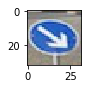

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


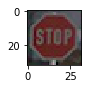

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


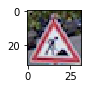

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


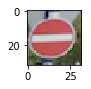

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


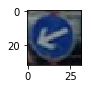

(5, 32, 32, 3)
(5,)


In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_test, y_test = test['features'], test['labels']

sample_size = 5
sample_index_list = random.sample(range(len(y_test)), sample_size)

def show_test_img(index, x, y):
    rcParams.update({'font.size': 10})
    rcParams['figure.figsize'] = 1, 1
    plt.imshow(x)
    plt.axis('off')
    plt.title(str(y) + ' : '+ signnames[y])
    plt.show()
    
# for i in range(len(sample_index_list)):
#     index = sample_index_list[i]
#     show_test_img(i+1, x_test[index], y_test[index])
# plt.show()

# sample_x = x_test[sample_index_list]
# sample_y = y_test[sample_index_list]

# print(sample_x.shape)

# print(sample_y.shape)

print('Image from web')
image1 = mpimg.imread('new_sign/traffic1.jpg')
image2 = mpimg.imread('new_sign/traffic2.jpg')

image3 = mpimg.imread('new_sign/traffic3.jpg')

image4 = mpimg.imread('new_sign/traffic4.jpg')
image5 = mpimg.imread('new_sign/traffic5.jpg')


rcParams.update({'font.size': 10})


rcParams['figure.figsize'] = 1, 1


print('This image is:', type(image1), 'with dimensions:', image1.shape)
plt.imshow(image1)
plt.show()
print('This image is:', type(image2), 'with dimensions:', image2.shape)

plt.imshow(image2)
plt.show()
print('This image is:', type(image3), 'with dimensions:', image3.shape)

plt.imshow(image3)
plt.show()
print('This image is:', type(image4), 'with dimensions:', image4.shape)

plt.imshow(image4)
plt.show()
print('This image is:', type(image5), 'with dimensions:', image5.shape)


plt.imshow(image5)
plt.show()

# web_x = x_test[0:0]
web_x = np.vstack([[image1], [image2], [image3], [image4], [image5]])
web_y = np.array([38, 14, 25,17, 39], dtype=np.int32)

sample_x = web_x
sample_y = web_y

print(sample_x.shape)

print(sample_y.shape)




### Predict the Sign Type for Each Image and Analyze performance Output Top 5 Softmax Probabilities For Each Image 


For the sample imagefind on the web, the current model is able to classify them. Case 2 have 2 have lower confidence comparing to other cases since the image is more blur. All of the examples are from Google Street view in German 

Start model load
Model load done
Overall acuracy 0.822011
Case 0
correct
predict = Keep right 
expect = Keep right 


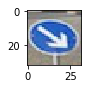

prediction rank=0 weight=0.999999 name =Keep right 
prediction rank=1 weight=0.000001 name =No entry 
prediction rank=2 weight=0.000000 name =Dangerous curve to the right 
prediction rank=3 weight=0.000000 name =Turn left ahead 
prediction rank=4 weight=0.000000 name =Go straight or right 
Case 1
correct
predict = Stop 
expect = Stop 


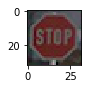

prediction rank=0 weight=0.850305 name =Stop 
prediction rank=1 weight=0.048051 name =No entry 
prediction rank=2 weight=0.029941 name =Turn right ahead 
prediction rank=3 weight=0.009610 name =Yield 
prediction rank=4 weight=0.008222 name =Keep right 
Case 2
correct
predict = Road work 
expect = Road work 


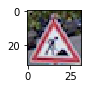

prediction rank=0 weight=0.745930 name =Road work 
prediction rank=1 weight=0.162092 name =Dangerous curve to the right 
prediction rank=2 weight=0.019920 name =Keep right 
prediction rank=3 weight=0.015916 name =Bicycles crossing 
prediction rank=4 weight=0.015053 name =Bumpy road 
Case 3
correct
predict = No entry 
expect = No entry 


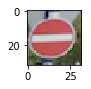

prediction rank=0 weight=0.999932 name =No entry 
prediction rank=1 weight=0.000048 name =Stop 
prediction rank=2 weight=0.000013 name =Priority road 
prediction rank=3 weight=0.000004 name =Turn left ahead 
prediction rank=4 weight=0.000002 name =Keep right 
Case 4
correct
predict = Keep left 
expect = Keep left 


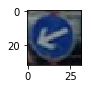

prediction rank=0 weight=0.990053 name =Keep left 
prediction rank=1 weight=0.009778 name =Turn right ahead 
prediction rank=2 weight=0.000132 name =Go straight or left 
prediction rank=3 weight=0.000010 name =Speed limit (70km/h) 
prediction rank=4 weight=0.000009 name =Stop 


In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

tf.reset_default_graph()
DROP_OUT_KEEP_PROB = 1.0
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

predition_output = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate_prediction(sess, X_data, y_data):
#     sess = tf.get_default_session()
    output = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, y: X_data})
    return output

def top5_evaluation(sess, X_data, y_data):
#     sess = tf.get_default_session()
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: X_data, y: X_data})
    return output

def show_img(i, index):
    rcParams.update({'font.size': 20})
    rcParams['figure.figsize'] = 40, 20
    random_indix = random.choice(range(class_indices[i], class_indices[i] + class_counts[i]))
    plt.subplot(11, 4, index)
    plt.imshow(x_train[random_indix])
    plt.axis('off')
    plt.title(str(i) + ' : '+ signnames[i])

def display_comparision(x, i, j):
    if (i == j):
        print("correct")
    else:
        print("wrong")
    plt.figure()
    plt.imshow(x)
    print('predict = %s ' % signnames[i])
    print('expect = %s ' % signnames[j])
    plt.show()

with tf.Session() as sess:
    print('Start model load')
    saver.restore(sess, './lenet')
    print('Model load done')
    sample_processed_x = [preprocess(x) for x in web_x]
    sample_y = web_y
#     sample_processed_x = [preprocess(x) for x in sample_x]
#     sample_y = sample_y
    processed_x_test = [preprocess(x) for x in x_test]
    y_test = y_test
    sample_predict = evaluate_prediction(sess, sample_processed_x, sample_y)
    test_accuracy = evaluate(processed_x_test, y_test)
    print("Overall acuracy %f"% test_accuracy)
    top5_sample_value, top5_sample_index = top5_evaluation(sess, sample_processed_x, sample_y)    
    case_index = 1
    for case_index in range(len(sample_predict)):
        print("Case %d"  % case_index)
        display_comparision(web_x[case_index], sample_predict[case_index],sample_y[case_index] )
        for rank in range(5):
            print('prediction rank=%d weight=%f name =%s ' % (rank, top5_sample_value[case_index][rank], signnames[top5_sample_index[case_index][rank]] ))
    


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")